# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

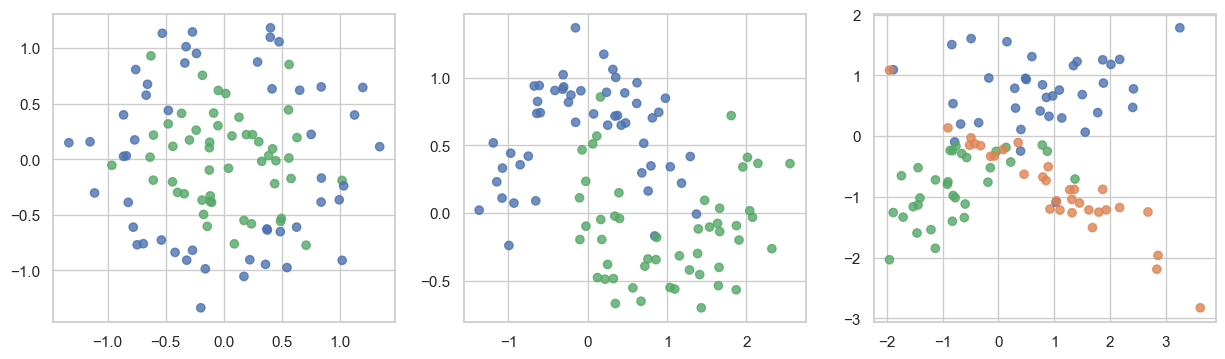

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

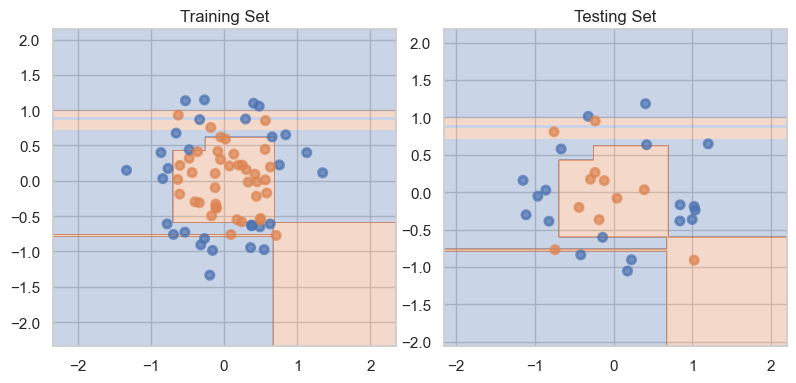

Dataset 1
Train accuracy = 1.0
Test accuracy = 0.7666666666666667



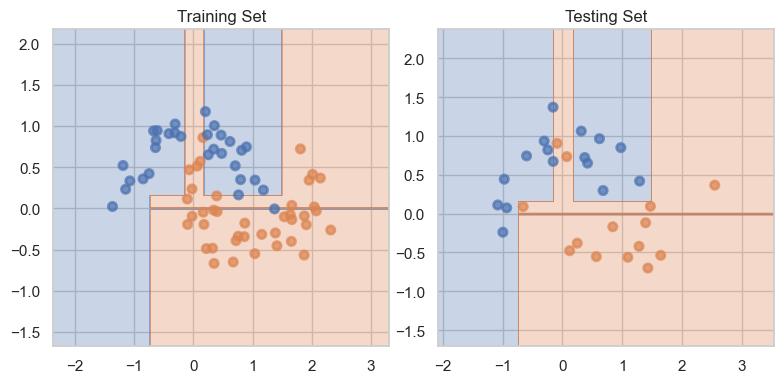

Dataset 2
Train accuracy = 1.0
Test accuracy = 0.8666666666666667



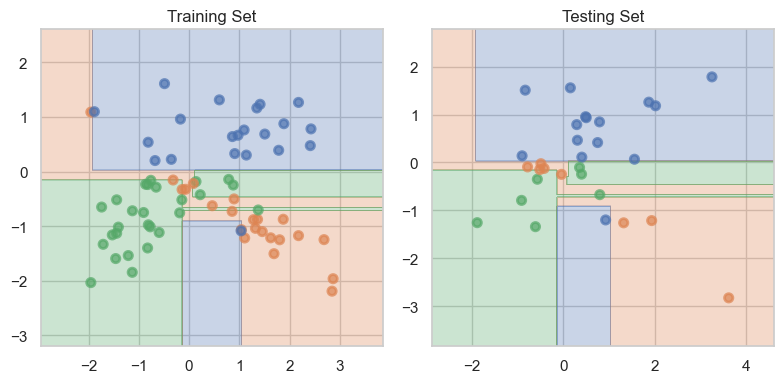

Dataset 3
Train accuracy = 1.0
Test accuracy = 0.7666666666666667



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

for i in range(3):
  X, y = datasets[i]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  clf = DecisionTreeClassifier().fit(X_train, y_train)
  train_preds = clf.predict(X_train)
  test_preds = clf.predict(X_test)

  plt.figure(figsize=(8, 4))

  plt.subplot(1, 2, 1)
  plot_surface(clf, X_train, train_preds)
  plt.title('Training Set')

  plt.subplot(1, 2, 2)
  plot_surface(clf, X_test, test_preds)
  plt.title('Testing Set')
  plt.tight_layout()
  plt.show()

  print(f'Dataset {i+1}')
  print(f'Train accuracy = {accuracy_score(y_train, train_preds)}')
  print(f'Test accuracy = {accuracy_score(y_test, test_preds)}\n')

__Ответ:__ Да, деревья сильно переобучились, на каждой картинке видно, что под отдельные объекты может выделяться разделяющая область (тонкие полоски могут проходить через удаленные точки). По accuracy тоже видим, что все 3 модели переобучены.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

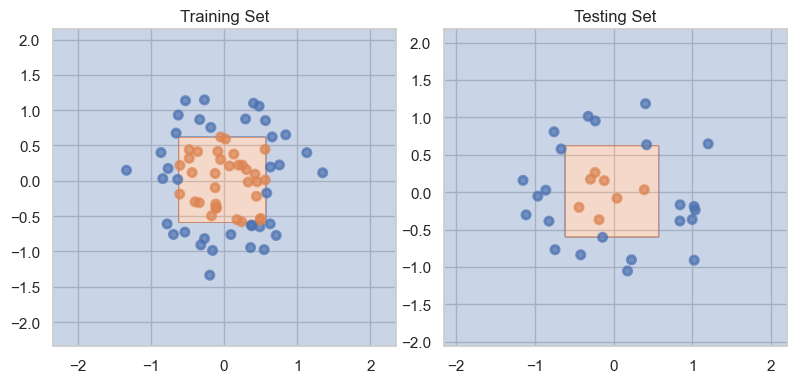

Dataset 1
max_depth = 4, min_samples_leaf = 5
Train accuracy = 0.8714285714285714
Test accuracy = 0.9



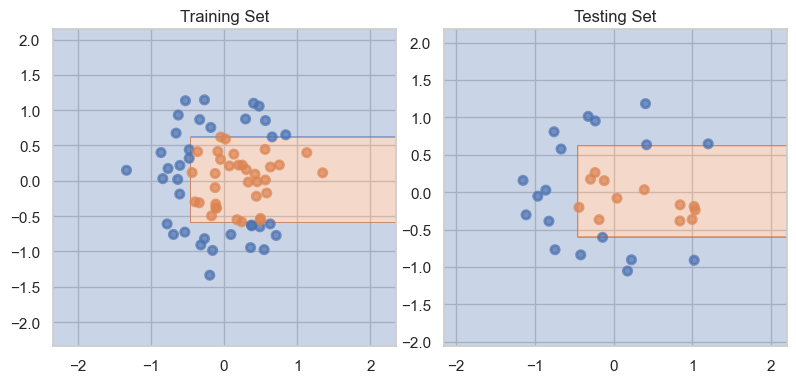

Dataset 1
max_depth = 4, min_samples_leaf = 7
Train accuracy = 0.8285714285714286
Test accuracy = 0.8



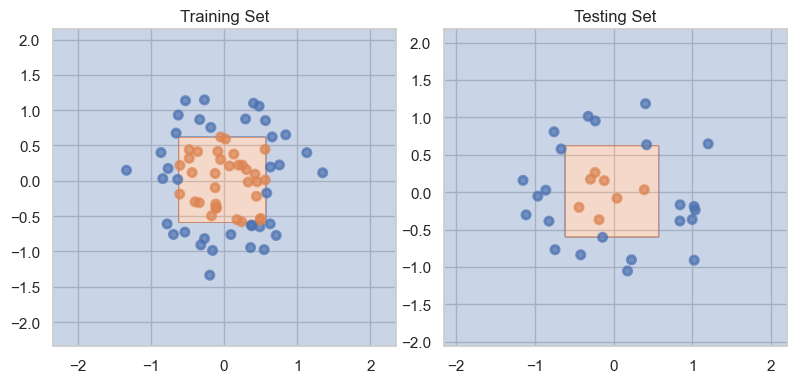

Dataset 1
max_depth = 6, min_samples_leaf = 5
Train accuracy = 0.8714285714285714
Test accuracy = 0.9



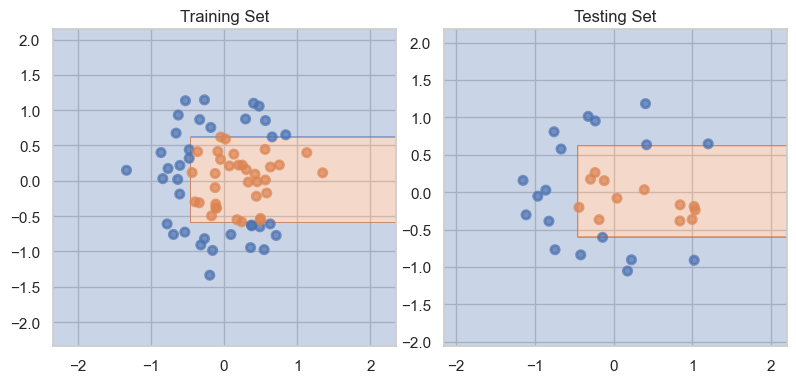

Dataset 1
max_depth = 6, min_samples_leaf = 7
Train accuracy = 0.8285714285714286
Test accuracy = 0.8



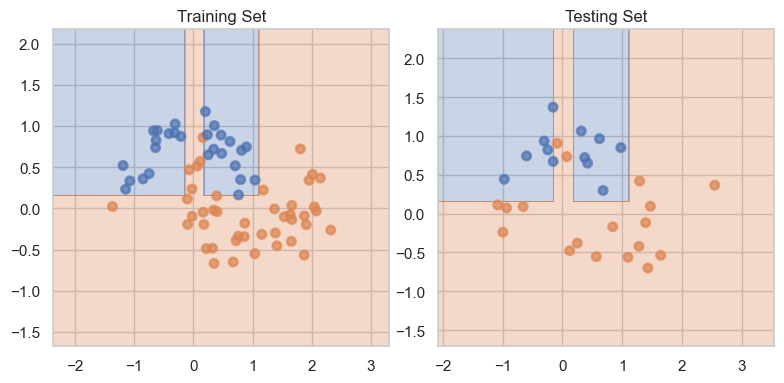

Dataset 2
max_depth = 4, min_samples_leaf = 5
Train accuracy = 0.9571428571428572
Test accuracy = 0.7333333333333333



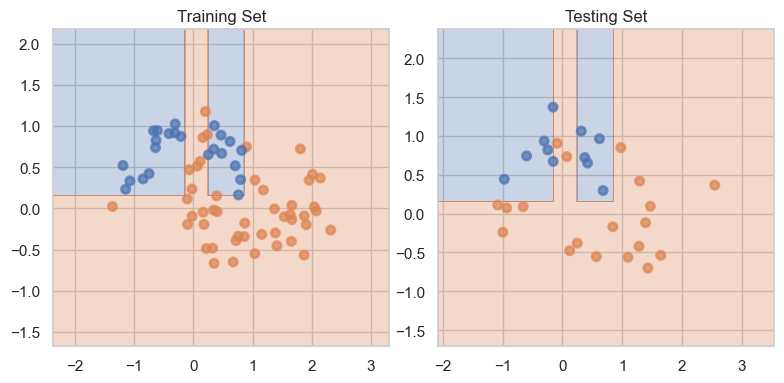

Dataset 2
max_depth = 4, min_samples_leaf = 7
Train accuracy = 0.9
Test accuracy = 0.7



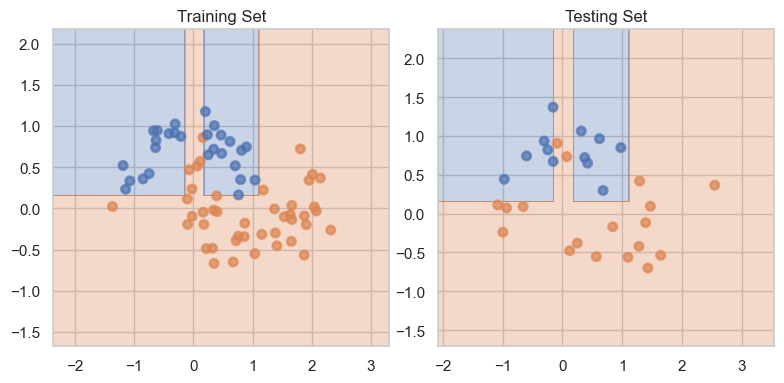

Dataset 2
max_depth = 6, min_samples_leaf = 5
Train accuracy = 0.9571428571428572
Test accuracy = 0.7333333333333333



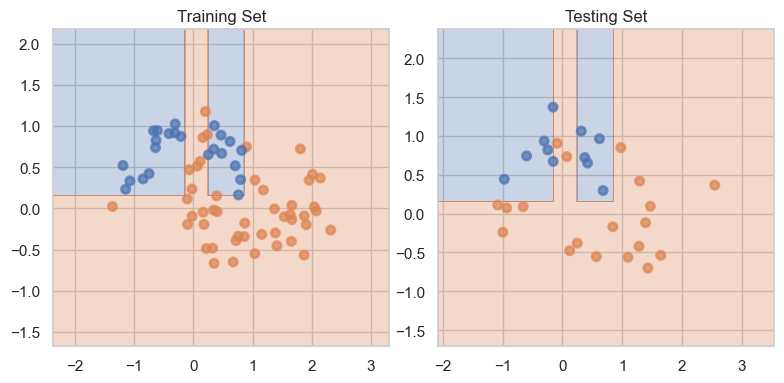

Dataset 2
max_depth = 6, min_samples_leaf = 7
Train accuracy = 0.9
Test accuracy = 0.7



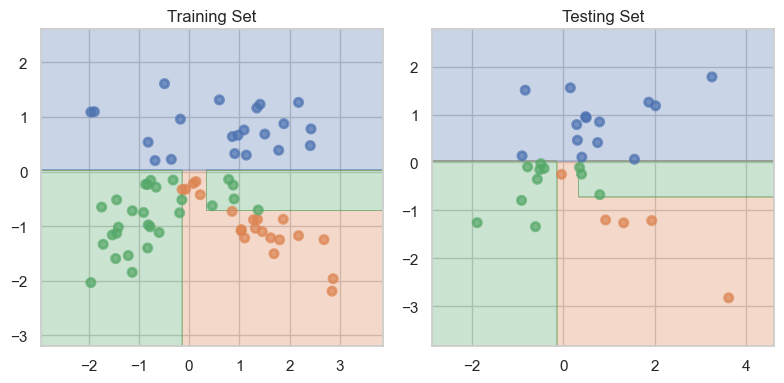

Dataset 3
max_depth = 4, min_samples_leaf = 5
Train accuracy = 0.9
Test accuracy = 0.7



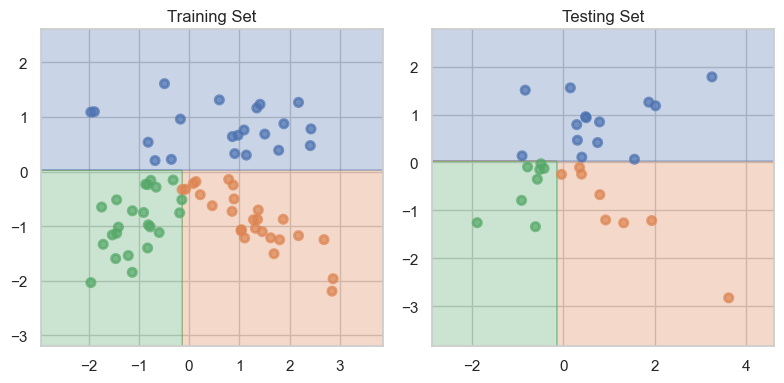

Dataset 3
max_depth = 4, min_samples_leaf = 7
Train accuracy = 0.8857142857142857
Test accuracy = 0.7666666666666667



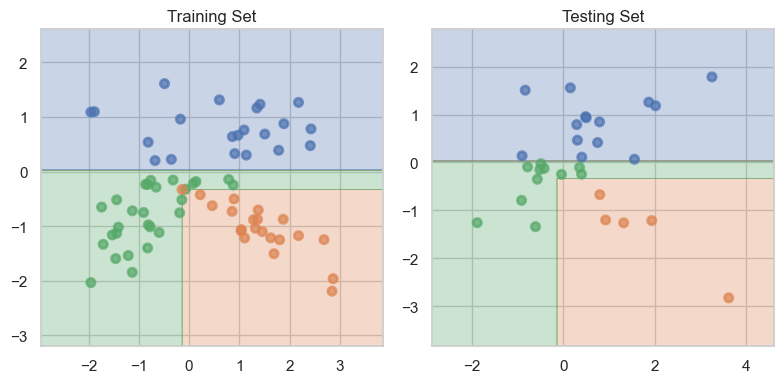

Dataset 3
max_depth = 6, min_samples_leaf = 5
Train accuracy = 0.9
Test accuracy = 0.7666666666666667



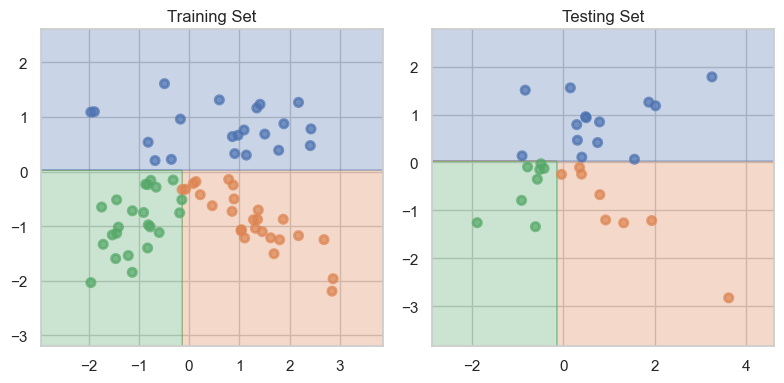

Dataset 3
max_depth = 6, min_samples_leaf = 7
Train accuracy = 0.8857142857142857
Test accuracy = 0.7666666666666667



In [7]:
from itertools import product
# переписать х_трейн и х_тест
max_depth = [4, 6]
min_samples_leaf = [5, 7]
combinations = list(product(max_depth, min_samples_leaf))

for k in range(3):
    X, y = datasets[k]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#     print(f'Dataset {i+1}')
    
    for i, j in combinations:
      clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j).fit(X_train, y_train)
      train_preds = clf.predict(X_train)
      test_preds = clf.predict(X_test)

      plt.figure(figsize = (8, 4))

      plt.subplot(1, 2, 1)
      plot_surface(clf, X_train, train_preds)
      plt.title('Training Set')

      plt.subplot(1, 2, 2)
      plot_surface(clf, X_test, test_preds)
      plt.title('Testing Set')
      plt.tight_layout()
      plt.show()
      print(f'Dataset {k+1}')
      print(f'max_depth = {i}, min_samples_leaf = {j}')
      print(f'Train accuracy = {accuracy_score(y_train, train_preds)}')
      print(f'Test accuracy = {accuracy_score(y_test, test_preds)}\n')

__Ответ:__ Настройка гиперпараметров помогла для датасетов 1 и 3, для датасета 2 все особо не поменялось, все равно переобучено и некрасиво, надо еще поковыряться и рассмотреть другие комбинации глубины и объектов в листе или вообще другие вариант гиперпараметров.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

In [8]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    
    indices = np.argsort(feature_vector)
    feature_vector, target_vector = feature_vector[indices],target_vector[indices]
    
    thresholds = np.diff(feature_vector)/2+feature_vector[:-1]
    cumulative_target_sum = np.cumsum(target_vector)
    cumulative_total_sum = np.arange(1, len(feature_vector)+1)

    left_size = cumulative_total_sum[:-1]
    right_size = len(feature_vector) - left_size

    p1_left = cumulative_target_sum[:-1] / left_size 
    p1_right = (cumulative_target_sum[-1] - cumulative_target_sum[:-1]) / right_size

    h_l =1 - p1_left**2 - (1-p1_left)**2
    h_r = 1 - p1_right**2 - (1-p1_right)**2

    ginis = -left_size/len(feature_vector)*h_l-right_size/len(feature_vector)*h_r

    thresholds, unique_indices = np.unique(thresholds, return_index=True)
    ginis = ginis[unique_indices]
    
    threshold_best = thresholds[np.argmax(ginis)]
    gini_best = ginis[np.argmax(ginis)]
    return thresholds, ginis, threshold_best, gini_best

In [9]:
feature_vector = np.array([2.5, 3.0, 1.5, 4.0, 3.5, 3.5, 3.5, 3.25])
target_vector = np.array([0, 1, 0, 1, 0, 1, 1, 1])
find_best_split(feature_vector, target_vector)

(array([2.   , 2.75 , 3.125, 3.375, 3.5  , 3.75 ]),
 array([-0.35714286, -0.20833333, -0.36666667, -0.4375    , -0.3       ,
        -0.42857143]),
 2.75,
 -0.20833333333333326)

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv')
df.head(3)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0


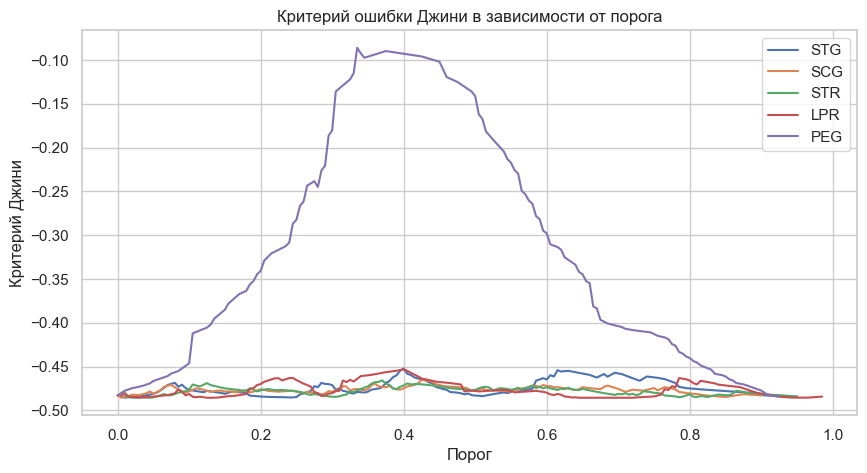

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title('Критерий ошибки Джини в зависимости от порога')
plt.xlabel('Порог')
plt.ylabel('Критерий Джини');
for i in df.columns[:-1]:
    thresholds, ginis, _, _= find_best_split(df[i].values, df.UNS.values)
    plt.plot(thresholds, ginis, label = i)
    plt.legend()

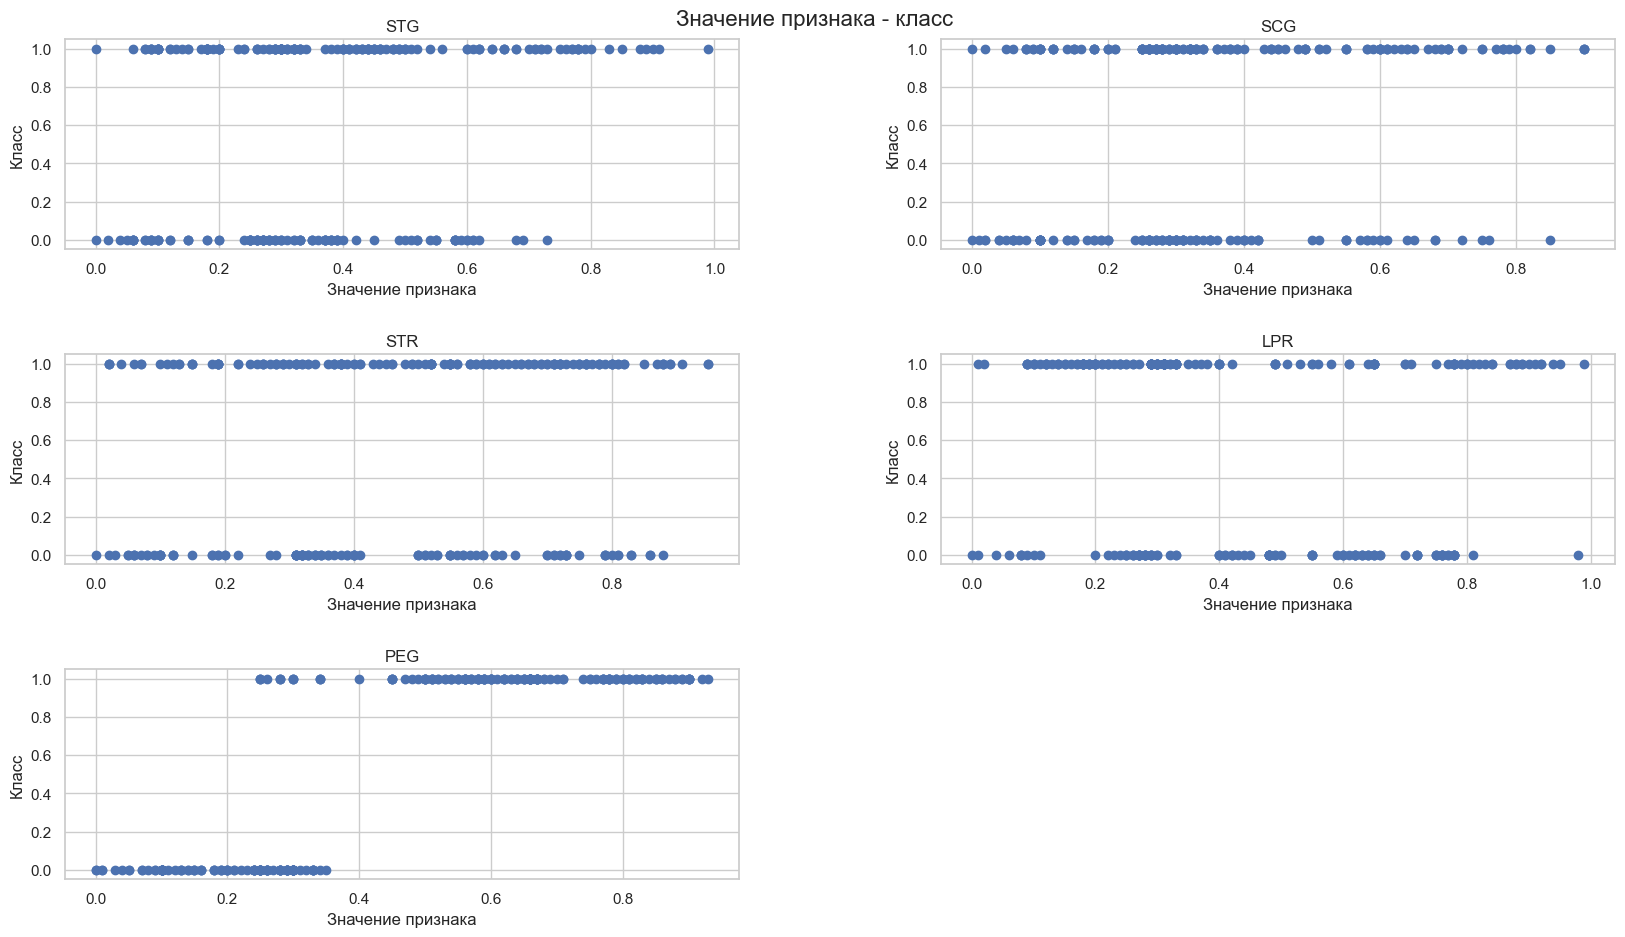

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.suptitle('Значение признака - класс', y=0.9, fontsize=16)

num = 0
for i in df.columns[:-1]:
    plt.subplot(4, 2, num+1)
    plt.scatter(df[i], df.UNS)
    plt.title(i)
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    num += 1

# Установить отступы между графиками
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Есть смысл делить выборку по признаку PEG - результаты экзамена по предмету, график критерия ошибки (Джини) принимает вид перевернутой параболы, хорошо виден минимум. По порогу, на котором достигается минимум хаотичности будем производить сплит - это у нас хороший признак.

По остальным признакам: графики ошибки еле двигаются - случаи крайне маловолатильны, какой порог ни взять - везде примерно одинаковое качество разбиения вершины... Везде ПЛОХОЕ

В общем лидер заметен сразу, по смыслу тоже все ок: мы решаем задачу классификации, где таргет UNS - уровень знаний пользователя. Можно предположить, что если человек сдал экзамен хорошо (PEG), то уровень знаний у него будет на уровне, то есть y = 1. Это наиболее значимый признак.

* STG - кол-во времени изучения материалов по предмету тарету
* SCG - кол-во повторений материалов по предмету таргету)
* STR - кол-во учебного времени по схожим предметам)
* LPR - экзамен. успеваемость по схожим с таргетом предметам
* PEG - экзамен. успеваемость по предмету таргету)
* UNS - уровень знаний пользователя (целевое значение)

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
# import wget
# !wget https://archive.ics.uci.edu/static/public/73/mushroom.zip
# !unzip mushroom.zip

In [14]:
from hw5code import DecisionTree
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head(3)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [15]:
from sklearn.preprocessing import LabelEncoder
for col in mushrooms.columns:
    le = LabelEncoder()
    mushrooms.loc[:, col] = le.fit_transform(mushrooms.loc[:, col])

target = mushrooms.p
features = mushrooms.drop(columns='p')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values,test_size=0.5, random_state=42)
feature_types = ['categorical']* X_train.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)
preds_test = tree.predict(X_test)
preds_train = tree.predict(X_train)
print(f' Test accuracy: {accuracy_score(y_test, preds_test)}')
print(f' Train accuracy: {accuracy_score(y_train, preds_train)}')

 Test accuracy: 1.0
 Train accuracy: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [17]:
tic_tac = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv')
tic_tac.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive


In [18]:
for col in tic_tac.columns:
    le = LabelEncoder()
    tic_tac.loc[:, col] = le.fit_transform(tic_tac.loc[:, col])
target = tic_tac.V10
features = tic_tac.drop(columns='V10')
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size = 0.3, random_state = 42)

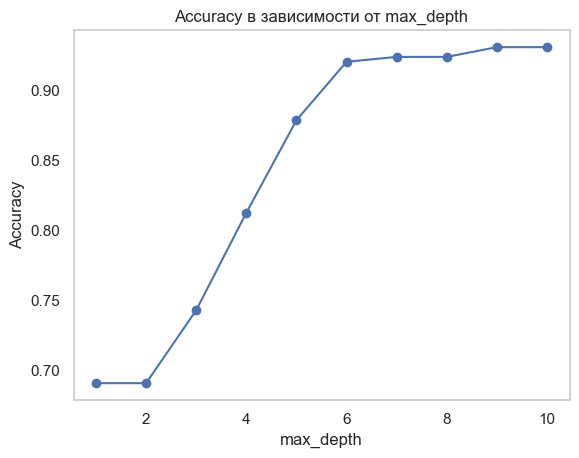

In [19]:
accuracies = []
for k in range(1, 11):
    feature_types = ['categorical'] * X_train.shape[1]
    model = DecisionTree(feature_types, max_depth=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.title('Accuracy в зависимости от max_depth')
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid()

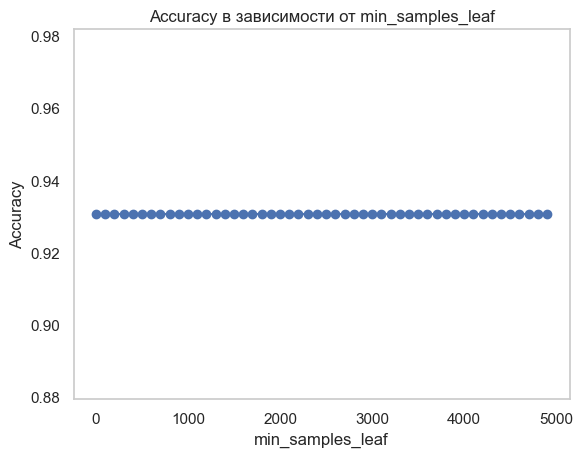

In [20]:
accuracies = []
for k in range(0, 5000, 100):
    feature_types = ['categorical'] * X_train.shape[1]
    model = DecisionTree(feature_types, min_samples_leaf=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.title('Accuracy в зависимости от min_samples_leaf')
plt.plot(range(0, 5000, 100), accuracies, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.grid()

тут какая то лажа, не должно быть так(((

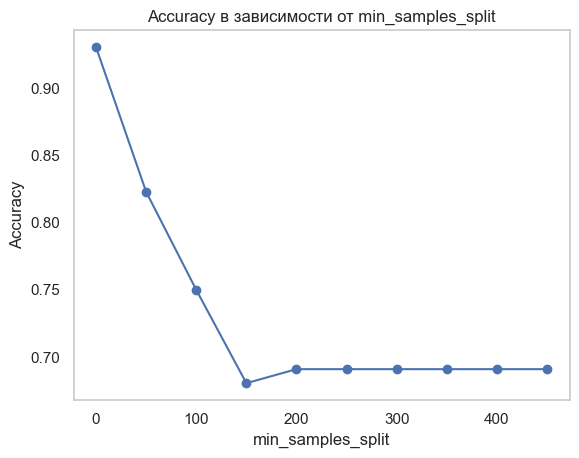

In [21]:
accuracies = []
for k in range(0, 500, 50):
    feature_types = ['categorical'] * X_train.shape[1]
    model = DecisionTree(feature_types, min_samples_split=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.title('Accuracy в зависимости от min_samples_split')
plt.plot(range(0, 500, 50), accuracies, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.grid()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [22]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

какой-то полнейший завал, ничего не успеваю